# Project Goal

Prepare a prototype of a machine learning model for Zyfra to predict the amount of gold recovered from gold ore. The model will help to optimize the production and eliminate unprofitable parameters.

# Initializing Data

In [85]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nanmean
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.dummy import DummyRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [86]:
# Importing Beta Bank file and checking data

train = pd.read_csv('gold_recovery_train.csv')
test = pd.read_csv('gold_recovery_test.csv')
full = pd.read_csv('gold_recovery_full.csv')

# Data Preprocessing
We will preprocess the data of each dataframe at a time.

##  Gold Recovery Train Data

In [87]:
# Review Gold Recovery Train Data
train.head(2)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In the train dataframe, there were 16860 rows and 87 columns. The date was an object, but the remaining columns were float types. Many of the columns have missing values which will interfere with model training so we will drop the missing values.

In [89]:
# Checking for duplicates in train

duplicate = train[train.duplicated()]
duplicate

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


There were no duplicates in the train data.

##  Gold Recovery Test Data

In [90]:
# Review Gold Recovery Test Data

test.head(2)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In the test data, there were 5856 rows and 53 columns.  The date was an object, but the remaining columns were float types. Many of the columns have missing values which will interfere with model training so we will drop the missing values.

In [92]:
# Checking for duplicates in test

duplicate = test[test.duplicated()]
duplicate

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


There were no duplicates in the train data.

###  Gold Recovery Full Data

In [93]:
# Review Gold Recovery Full Data

full.head(2)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [94]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In the full data, there were 22716 rows and 87 columns. The data was an object, but the remaining columns were float types. Many of the columns have missing values which will interfere with model training so we will drop the missing values later on.

In [95]:
# Checking for duplicates in test

duplicate = full[full.duplicated()]
duplicate

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


There were no duplicates in full.

## Calculating Recovery

We will check that rougher output recovery was calculated correctly. Using the training set, we will calculate recovery for the rougher.output.recovery feature and find the MAE between our calculations and the feature values.

In [96]:
# Creating function for calculating recovery

def recovery(df, C, F, T):
    
    rec = (df[C] * (df[F]-df[T])) / (df[F] * (df[C]-df[T])) * 100
    
    return rec 

In [97]:
# Calculating rougher_output_recovery using recovery function

rougher_output_recovery_calc = recovery(train,'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au')
rougher_output_recovery_calc

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64

In [98]:
# Creating a function to calculate MAE between our findings and the rougher.output.recovery feature

def mae(recovery, calc):
    recovery, calc = np.array(recovery), np.array(calc)
    return nanmean(np.abs(recovery - calc))

In [99]:
 mae(train['rougher.output.recovery'], rougher_output_recovery_calc)

9.303415616264301e-15

The MAE between our calculations and the rougher_output_recovery values in the train set was almost zero, so we can be confident that the rougher.output.recovery is valid. The slight discrepancy in the values we calculated and the values in the dataframe may be the result of incorrect calculations or rounding differences in the calculations that were performed.

## Test Set Feature Analysis

We will compare the features in the test set with the train set to check for missing features.

In [100]:
# Comparing train and test dataframes to identify features missing from test dataframe

train_missing = list(set(train) - set(test))
train_missing

['primary_cleaner.output.tail_ag',
 'primary_cleaner.output.concentrate_sol',
 'final.output.tail_au',
 'rougher.output.concentrate_au',
 'secondary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'rougher.output.tail_au',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.au_pb_ratio',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_sol',
 'rougher.output.concentrate_pb',
 'rougher.output.recovery',
 'rougher.output.tail_sol',
 'secondary_cleaner.output.tail_pb',
 'final.output.tail_ag',
 'final.output.concentrate_ag',
 'rougher.output.tail_ag',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'final.output.recovery',
 'final.output.tail_sol',
 'rougher.output.tail_pb',
 'primary_cleaner.output.concentrate_ag',
 'final.output.tail_pb',
 'rougher.

The features missing in the test set were those pertaining to outputs or calculations. It seems these were omitted from the test set since these values can only be obtained after the process has been completed and they would not help to train a model to predict metal concentrations. We will take this into account when assigning our features and targets to train our model after data preprocessing is completed.


# Exploratory Data Analysis

We will explore the concentrations of metals at different purification stages to check how the purification affects the metal concentration levels and to find any anomalies.

## Histograms of Concentrations of Each Metal Across Purification Stages

We will plot the distribution of the concentrations of each metal at each purification stage to explore how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage. We will create a function to plot the distribution of concentrations of Au, Ag, and Pb separately across purification stages.

In [101]:
# Creating a function to plot the distribution of concentrations of metals across purification stages.

def conc_hist(df, rougher_input_feed, rougher_output_concentrate, rougher_output_tail, primary_cleaner_output_concentrate,\
              primary_cleaner_output_tail, secondary_cleaner_output_tail, final_output_concentrate, final_output_tail):

    plt.hist(df[rougher_input_feed], alpha=.5, color= 'purple', bins=50);
    plt.hist(df[rougher_output_concentrate], alpha=.5, color= 'yellow', bins=50);
    plt.hist(df[rougher_output_tail], alpha=.5, color= 'blue', bins=50);
    plt.hist(df[primary_cleaner_output_concentrate], alpha=.5, color= 'orange', bins=50);
    plt.hist(df[primary_cleaner_output_tail], alpha=.5, color= 'grey', bins=50);
    plt.hist(df[secondary_cleaner_output_tail], alpha=.5, color= 'pink', bins=50);
    plt.hist(df[final_output_concentrate], alpha=.5, color= 'red', bins=50);
    plt.hist(df[final_output_tail], alpha=.5, color= 'green', bins=50);
    plt.legend([rougher_input_feed, rougher_output_concentrate, rougher_output_tail,\
            primary_cleaner_output_concentrate, primary_cleaner_output_tail, secondary_cleaner_output_tail, \
           final_output_concentrate, final_output_tail], loc='upper right', bbox_to_anchor=(1.75, 1.0))
    plt.title('Concentration Across Purification Stages')
    plt.xlabel('Concentration')
    plt.ylabel('Frequency')
    plt.show()

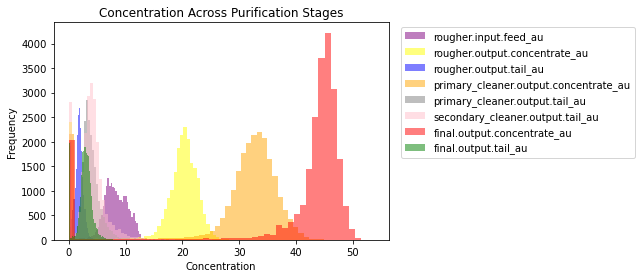

In [102]:
# Applying a function to plot the distribution of concentrations of Au across purification stages.

conc_hist(full,'rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au',\
              'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_au',\
             'secondary_cleaner.output.tail_au', 'final.output.concentrate_au', 'final.output.tail_au')

The concentration of Au increased throughout the purification process. The median concentration level in the feed was around 8 and in the final.output.concentrate it was around 45. This makes sense, because the purification process is designed to extract gold.

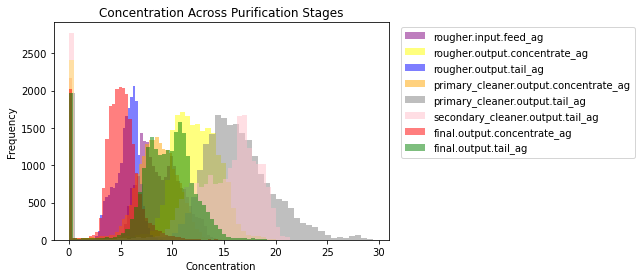

In [103]:
# Applying a function to plot the distribution of concentrations of Ag across purification stages.

conc_hist(full,'rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'rougher.output.tail_ag',\
              'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.tail_ag',\
             'secondary_cleaner.output.tail_ag', 'final.output.concentrate_ag', 'final.output.tail_ag')

The concentration of Ag in the output.concentrates decreased, yet it increased in the output.tails through the purification process. This makes sense, because the purification process is designed to extract gold and separate out the silver.

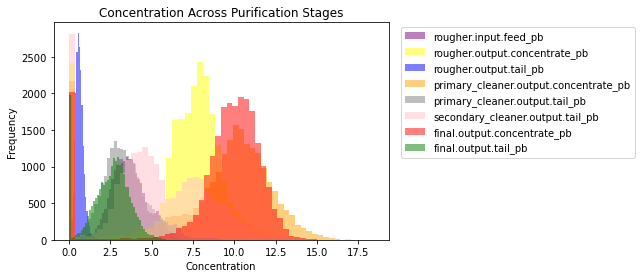

In [104]:
# Applying a function to plot the distribution of concentrations of Pb across purification stages.

conc_hist(full,'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'rougher.output.tail_pb',\
              'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.tail_pb',\
             'secondary_cleaner.output.tail_pb', 'final.output.concentrate_pb', 'final.output.tail_pb')

The concentration of Pb in the output concentrate increased through the purification process. The median concentration level in the input feed was 2.7 and it was around 10 in the final.output.concentrate. It appears that lead is filtered along with gold through the purification process.

Overall, the concentrations of Au and Pb in the output concentration increased through the purification process. The concentrations of Au and Pb seemed somewhat correlated. However, the concentration of Ag decreased through the purification process. 

## Histograms of Concentrations of Metals At Each Purification Stage

We will plot the distribution of the concentrations of all metal at each purification stage to explore how the relative concentrations of metals (Au, Ag, Pb) change depending on the purification stage. We will create a function to plot the distribution of concentrations of Au, Ag, and Pb at purification stage.

In [105]:
# Creating a function to plot the distribution of concentrations of metals at each purification stages.

def metals_conc(df, au, ag, pb):
    
    plt.hist(df[au], alpha=.5, color= 'red', bins=50);
    plt.hist(df[ag], alpha=.5, color= 'green', bins=50);
    plt.hist(df[pb], alpha=.5, color= 'blue', bins=50);
    plt.legend([au, ag, pb], loc='upper right', bbox_to_anchor=(1.5, 1.0))
    plt.title('Concentration of Metals At Each Purification Stage')
    plt.xlabel('Concentration')
    plt.ylabel('Frequency')
    plt.show()

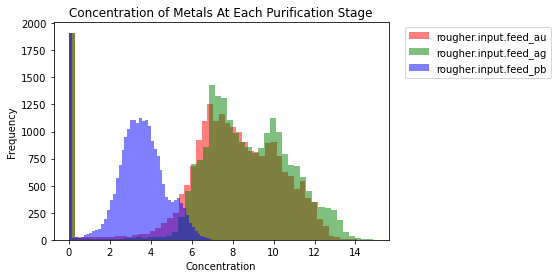

In [106]:
# Plotting the distribution of metals in 'rougher.input.feed'

metals_conc(full,'rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb')

The concentrations of Au and Ag were similar in the feed, while the concentration of Pb was relatively lower.

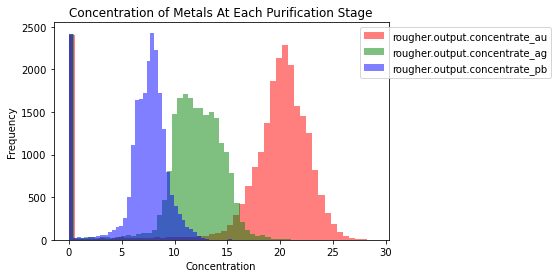

In [107]:
# Plotting the distribution of metals in 'rougher.output.concentrate'

metals_conc(full,'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb')

There were relatively normal distributions of metals in the rougher.output.concentrate, with the highest being Au, followed by Ag, and Pb. Yet there were also some abnormally low values of concentrate. These outliers need to be removed before model training.

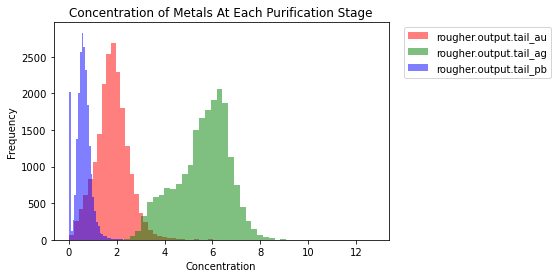

In [108]:
# Plotting the distribution of metals in 'rougher.output.tail'

metals_conc(full,'rougher.output.tail_au', 'rougher.output.tail_ag', 'rougher.output.tail_pb')

In the rougher.output.tail, Ag had the highest concentration with a median of 6 and Au and Pb had lower levels of concentration. This makes sense since the tail had the silver that was separated out through the purification process.

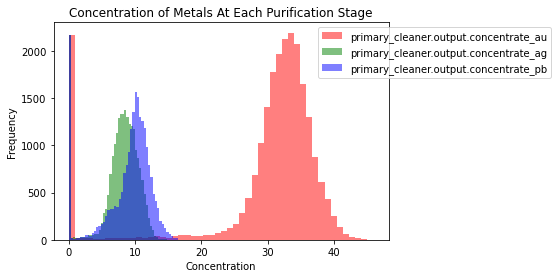

In [109]:
# Plotting the distribution of metals in 'primary_cleaner.output.concentrate'

metals_conc(full,'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb')

There were relatively normal distributions of metals in the primary_cleaner.output.concentrate, with the highest being Au, followed by Ag and Pb. Yet there were also some abnormally low values of the metals in the concentrate. These outliers need to be removed before model training.

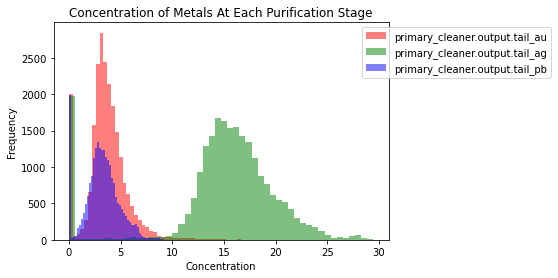

In [110]:
# Plotting the distribution of metals in 'primary_cleaner.output.tail'

metals_conc(full,'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb')

In the primary_cleaner.output.tail, Ag had the highest concentration with a median of 15 and Au and Pb had lower levels of concentration. This makes sense since the tail had the silver that was separated out through the purification process. Yet there were also some abnormally small concentration levels of metals.

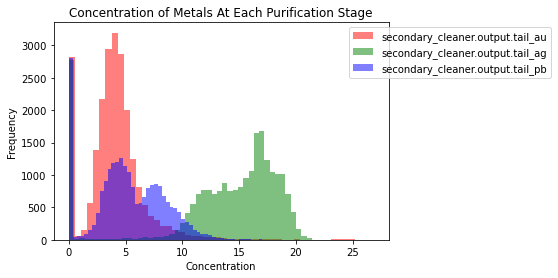

In [111]:
# Plotting the distribution of metals in 'secondary_cleaner.output.tail'

metals_conc(full, 'secondary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb')

In the secondary_cleaner.output.tail, Ag had the highest concentration  and Au and Pb had lower levels of concentration. This makes sense since the tail had the silver that was separated out through the purification process. Yet there were also some abnormally small concentration levels of metals.

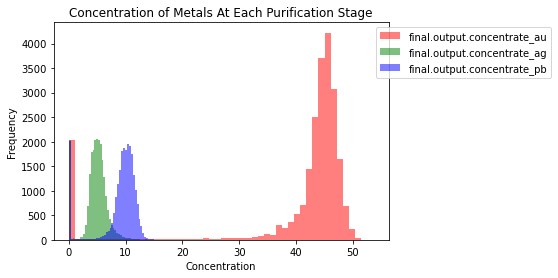

In [112]:
# Plotting the distribution of metals in 'final.output.concentrate'

metals_conc(full, 'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb')

In the final.output.concentrate, there were relatively normal distributions of metals, with the highest being Au, followed by Ag and Pb. Yet there were also some abnormally low values of the metals in the concentrate. These outliers need to be removed before model training.

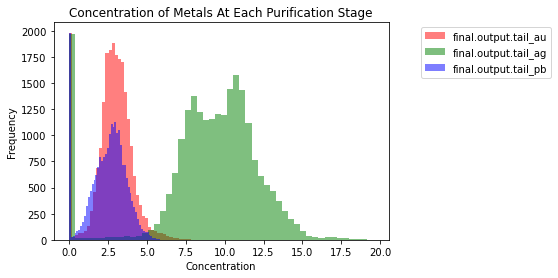

In [113]:
# Plotting the distribution of metals in 'final.output.tail'

metals_conc(full,'final.output.tail_au', 'final.output.tail_ag', 'final.output.tail_pb')

As expected, the concentration of Au increased in the output concentrate at each stage of the purification process. The ration of of Ag and Pb to Au decreased in the output concentrate. Conversely, the ratio of Ag to Au and Pb increased in the output tail at each stage of purification. In the final.output.concentrate, there were relatively normal distributions of metals, with the highest being Au, followed by Ag and Pb. Yet there were also some abnormally low values of the metals in the concentrate. These outliers need to be removed before model training.

## Comparison of Train and Test Set Feed Particle Size Distribution

We will compare the feed particle size distributions in the training and test sets.  If the distributions vary significantly, the model evaluation will be incorrect.

In [114]:
# Creating a function to compare the particle size distributions in the training and test sets

def feed(df, rougher_input_feed_size):

    plt.hist(df[rougher_input_feed_size], alpha=.5, color= 'red', bins=50);
    plt.legend([rougher_input_feed_size], loc='upper right')
    plt.title('Feed Particle Size Distribution')
    plt.xlabel('Feed Size')
    plt.ylabel('Frequency')
    plt.show()

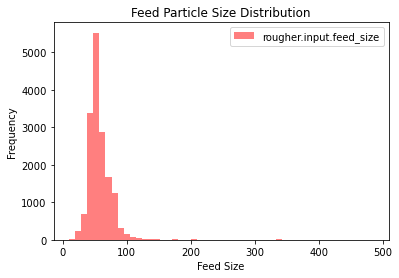

In [115]:
feed(train, 'rougher.input.feed_size')

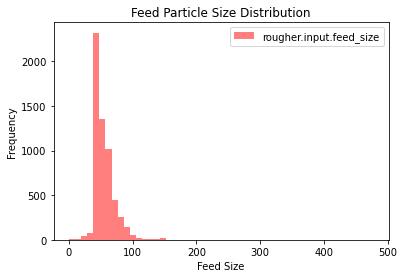

In [116]:
feed(test, 'rougher.input.feed_size')

The feed particle size distributions in the train and test data seem to have similar distributions, but it seems that outliers are affecting the distributions so the histograms are different. Let's examine the range of concentrations further with statistics.

In [117]:
train['rougher.input.feed_size'].describe()

count    16443.000000
mean        58.676444
std         23.922591
min          9.659576
25%         47.575879
50%         54.104257
75%         65.051064
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [118]:
test['rougher.input.feed_size'].describe()

count    5834.000000
mean       55.937535
std        22.724254
min         0.046369
25%        43.890852
50%        50.002004
75%        61.638434
max       477.445473
Name: rougher.input.feed_size, dtype: float64

The median feed particle size level in the train set was 54 and the mean was 57
Yet, the median feed particle size level in the test set was 50 and the mean was 55. The difference between the medians and the means indicates that the median is affected by outliers. We can see the outliers since the min and medians are far away from the median and means.

It is difficult to assess the way these outliers will affect the model training. Let's examine the total concentrations of metals at each stage to check for outliers. It's possible that there is a very small amount of one metal in the sample, but not of all three metals simultaneously.

## Total Concentrations at Different Stages

Let's explore the total concentrations at each stage. We will create a function to sum the concentrations of the metals at different stages: raw feed, rougher concentrate, and final concentrate.

In [119]:
# Creating a function to sum concentrations of Au, Ag, and Pb at different stages

def total_conc(df, au, ag, pb):
    for i in df:
        total = df[au] + df[ag] + df[pb]
    return total

In [120]:
# Calculating total concentration of metals in raw feed

full['total_feed'] = total_conc(full,'rougher.input.feed_au', 'rougher.input.feed_ag' , 'rougher.input.feed_pb')

In [121]:
# Visualizing distribution of total concentration of metals in raw feed

def totals(column):
    plt.hist(full[column], alpha=.5, color= 'red', bins=50);
    plt.legend([column], loc='upper right')
    plt.title('Total Metal Concentration Distribution')
    plt.xlabel('Total Concentration')
    plt.ylabel('Frequency')
    plt.show()

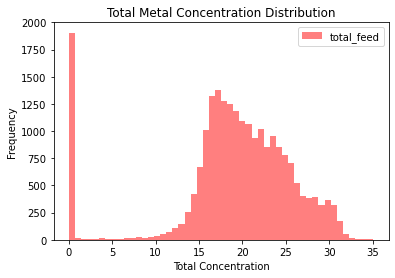

In [122]:
totals('total_feed')

In [123]:
# Calculating total concentration of metals in rougher concentrate

full['total_rougher'] = total_conc(full,'rougher.output.concentrate_au', 'rougher.output.concentrate_ag' , 'rougher.output.concentrate_pb') 

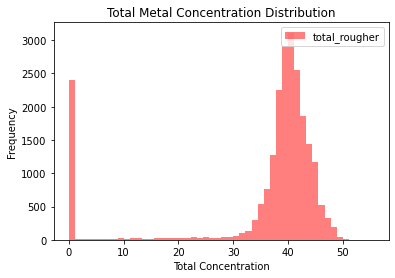

In [124]:
totals('total_rougher')

In [125]:
# Calculating total concentration of metals in final concentrate

full['total_final'] = total_conc(full,'final.output.concentrate_au', 'final.output.concentrate_ag' , 'final.output.concentrate_pb')

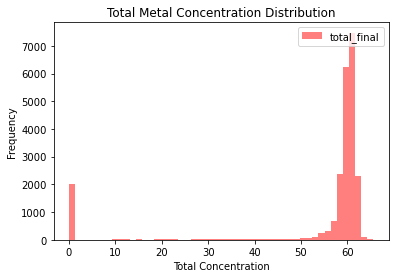

In [126]:
totals('total_final')

There are significant outliers in the total concentrations of metals at different stages. There are fewer outliers in the output as time goes on. We will eliminate instances with these abnormally low levels of concentrate in the total_feed, which is the start of the process.

## Eliminating Outliers

We will eliminate the outliers in the 'total_feed', since this is the first step in the process. To do so, we will create a function to remove values 1.5(IQR) above the Q3 and below the Q1 range.

In [127]:
# Creating function for eliminating outliers

def outliers(df, column):
        
        #finding Q1 and Q2
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
       
        #finding the IQR
        IQR = Q3-Q1
        
        #finding the upper and lower limit
        upper_limit = Q3 + 1.5*IQR
        lower_limit = Q1 - 1.5*IQR
        
        #finding outliers
        df[column > upper_limit]
        df[column < lower_limit]
        
        #trimming
        df = df[column < upper_limit]
        df = df[column > lower_limit]
        return df        

In [128]:
# Applying the outliers function to the 'total_feed' values in the full data

full = outliers(full, full['total_feed']) 
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20479 entries, 0 to 22715
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                20479 non-null  object 
 1   final.output.concentrate_ag                         20472 non-null  float64
 2   final.output.concentrate_pb                         20473 non-null  float64
 3   final.output.concentrate_sol                        20205 non-null  float64
 4   final.output.concentrate_au                         20474 non-null  float64
 5   final.output.recovery                               20258 non-null  float64
 6   final.output.tail_ag                                20477 non-null  float64
 7   final.output.tail_pb                                20461 non-null  float64
 8   final.output.tail_sol                               20410 non-null  float64


In [129]:
# Applying the function to recalculate the total concentrations at the feed level

full['total_feed'] = total_conc(full,'rougher.input.feed_au', 'rougher.input.feed_ag' , 'rougher.input.feed_pb')

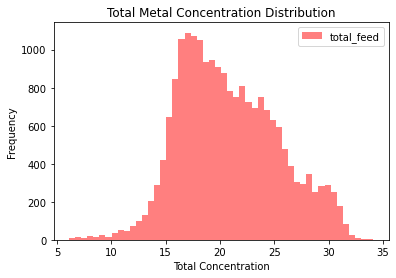

In [130]:
# Reexamining the total distrbution of the 'total_feed'

totals('total_feed')

After removing outliers, 20479 records or 90% of the data in the full data remain. We will use this data and filter it to create a new train and a new test set that would have the same order of columns and rows to help train our model. 

## New Train Set

We will use the train df to filter records from the full df that belong to the train set.
Then we will filter the new train df so that it will contain only the features matching with the test set. This filtered train df will be used to assign the features in model training. Before we do this, we will drop missing values from the full data.

In [131]:
# Dropping missing values from full for model training

full = full.dropna()
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16082 entries, 0 to 22715
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16082 non-null  object 
 1   final.output.concentrate_ag                         16082 non-null  float64
 2   final.output.concentrate_pb                         16082 non-null  float64
 3   final.output.concentrate_sol                        16082 non-null  float64
 4   final.output.concentrate_au                         16082 non-null  float64
 5   final.output.recovery                               16082 non-null  float64
 6   final.output.tail_ag                                16082 non-null  float64
 7   final.output.tail_pb                                16082 non-null  float64
 8   final.output.tail_sol                               16082 non-null  float64


After dropping mxissing values, the train set contained 11001 rows, the remaining 65% of the data.

In [132]:
# Filtering full to identify records in train set using 'date' as a common identifier

train2 = full.loc[full['date'].isin(train['date'])]
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11006 entries, 0 to 22715
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                11006 non-null  object 
 1   final.output.concentrate_ag                         11006 non-null  float64
 2   final.output.concentrate_pb                         11006 non-null  float64
 3   final.output.concentrate_sol                        11006 non-null  float64
 4   final.output.concentrate_au                         11006 non-null  float64
 5   final.output.recovery                               11006 non-null  float64
 6   final.output.tail_ag                                11006 non-null  float64
 7   final.output.tail_pb                                11006 non-null  float64
 8   final.output.tail_sol                               11006 non-null  float64


In [133]:
# Filtering train set so that it contains only 53 columns containing features included in the test set

train2_missing = list(set(train2) - set(test))
train2_matching = list(set(train2) - set(train2_missing))
train2_matching.sort()
train2_features = train2.filter(train2_matching, axis=1)

train2_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11006 entries, 0 to 22715
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        11006 non-null  object 
 1   primary_cleaner.input.depressant            11006 non-null  float64
 2   primary_cleaner.input.feed_size             11006 non-null  float64
 3   primary_cleaner.input.sulfate               11006 non-null  float64
 4   primary_cleaner.input.xanthate              11006 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      11006 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    11006 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      11006 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    11006 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      11006 non-null  float64
 10  primary_cl

## New Test Set

We will use the test df to filter records from the full df that belong to the test set.
Then we will filter the new test df so that it will contain only the features matching with the test set. This filtered train df will be used to assign the features in model training.

In [134]:
# Filtering full to identify records in train set using 'date' as a common identifier.

test2 = full.loc[full['date'].isin(test['date'])]

test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5076 entries, 5521 to 17208
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                5076 non-null   object 
 1   final.output.concentrate_ag                         5076 non-null   float64
 2   final.output.concentrate_pb                         5076 non-null   float64
 3   final.output.concentrate_sol                        5076 non-null   float64
 4   final.output.concentrate_au                         5076 non-null   float64
 5   final.output.recovery                               5076 non-null   float64
 6   final.output.tail_ag                                5076 non-null   float64
 7   final.output.tail_pb                                5076 non-null   float64
 8   final.output.tail_sol                               5076 non-null   float6

After dropping missing values, the test set contained 5073 rows, the remaining 87% of our data.

In [135]:
# Filtering test set so that it containsonly 53 columns containing features included in the test set

test2_missing = list(set(test2) - set(test))
test2_matching = list(set(test2) - set(test2_missing))
test2_matching.sort()
test2_features = test2.filter(test2_matching, axis=1)

test2_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5076 entries, 5521 to 17208
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5076 non-null   object 
 1   primary_cleaner.input.depressant            5076 non-null   float64
 2   primary_cleaner.input.feed_size             5076 non-null   float64
 3   primary_cleaner.input.sulfate               5076 non-null   float64
 4   primary_cleaner.input.xanthate              5076 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5076 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5076 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5076 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5076 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5076 non-null   float64
 10  primary_

# Model Development

We will assign different dataframes to the train and test features and targets.

In [136]:
# Selecting the features and targets

features_train = train2_features.drop(['date'], axis=1) 
target_train = train2[['rougher.output.recovery', 'final.output.recovery']]

features_test = test2_features.drop(['date'], axis=1)
target_test = test2[['rougher.output.recovery', 'final.output.recovery']]

## Data Standardization 

We need to standardize the features so that features with higher values do not get unnecessary weighting during the model training. We will use standard scaler to standardize the data.

We will create a function to calculate the SMAPE value and train models to predict the outcomes of the purification process.

## SMAPE Function

In [137]:
# Creating function to calculate sMAPE.
def smape2(y_true, y_pred):
    smape = np.mean(abs(y_pred - y_true) / ((abs(y_true) + abs(y_pred)) / 2)) * 100 
    return smape

In [138]:
# Create function to calculate final sMAPE.
def final_smape(smape_rougher, smape_final):
    fs = (0.25 * (smape_rougher)) + ( 0.75 * (smape_final))
    return fs

# Model Training

We will create a function to score the model training using sMAPE with make_scorer as a scorer for cross validation.

In [139]:
# Creating function for model training using cross-validation

def cross_val(model, features, target):
    
    scores = cross_val_score(model, features, target, cv=5, scoring=make_scorer(smape2), verbose=0)
    final_score = sum(scores) / len(scores)
    return final_score

Since there are two outputs, we will split the target into two outputs in order to train and score each model. We will select as the best model the model that has the lowest combined sMAPE score.

In [140]:
# Selecting the features and targets

features_train = train2_features.drop(['date'], axis=1) 
target_rougher = train2['rougher.output.recovery']
target_final = train2['final.output.recovery']

features_test = test2_features.drop(['date'], axis=1)
test_rougher = test2['rougher.output.recovery']
test_final = test2['final.output.recovery']

## Linear Regression Training

In [141]:
model = LinearRegression()
lr_smape_rougher = cross_val(model, features_train, target_rougher)
lr_smape_rougher

11.850419615540915

In [142]:
model = LinearRegression()
lr_smape_final = cross_val(model, features_train, target_final)
lr_smape_final

9.74963852285416

In [143]:
lr_final_smape= final_smape(lr_smape_rougher, lr_smape_final)
lr_final_smape

10.274833796025849

## DecisionTreeRegressor Training

We will train a model using DecisionTreeRegressor and tune hyperparameters to find the best model.

In [144]:
# Developing a model with DecisionTreeRegressor for target_rougher
 
best_model = None
best_result = 100

for depth in range(1, 6):
    model = DecisionTreeRegressor(max_depth=depth) 
    result = cross_val(model, features_train, target_rougher)
    if result < best_result:
        best_model = model
        best_result = result
        dt_smape_rougher = best_result
        
print("max_depth =", depth)
print("sMAPE score:", best_result)

max_depth = 5
sMAPE score: 10.716636401631261


In [145]:
# Developing a model with DecisionTreeRegressor for target_final
 
best_model = None
best_result = 100

for depth in range(1, 6):
    model = DecisionTreeRegressor(max_depth=depth) 
    result = cross_val(model, features_train, target_final)
    if result < best_result:
        best_model = model
        best_result = result
        dt_smape_final = best_result
        
print("max_depth =", depth)
print("sMAPE score:", best_result)

max_depth = 5
sMAPE score: 8.731889281750501


In [146]:
dt_final_smape = final_smape(dt_smape_rougher, dt_smape_final)
dt_final_smape

9.22807606172069

## RandomForestRegressor

We will train a model using RandomForestRegressor and tune hyperparameters to find the best model.

In [147]:
# Developing a model with RandomForestRegressor for target_rougher
 
best_score = 100
best_est = 0
for est in range(1, 5):
    model = RandomForestRegressor(n_estimators= est)
    score = cross_val(model, features_train, target_rougher)
    if score < best_score:
        best_score = score 
        best_est = est 
        rf_smape_rougher = best_score
 
print("sMAPE score (n_estimators = {}): {}".format(best_est, best_score))

sMAPE score (n_estimators = 4): 15.68307978464355


In [148]:
# Developing a model with RandomForestRegressor for target_final
 
best_score = 100
best_est = 0
for est in range(1, 5): 
    model = RandomForestRegressor(n_estimators= est) #
    score = cross_val(model, features_train, target_final)
    if score < best_score:
        best_score = score 
        best_est = est
        rf_smape_final = best_score
 
print("sMAPE score (n_estimators = {}): {}".format(best_est, best_score))

sMAPE score (n_estimators = 4): 12.831903472201812


In [149]:
rf_final_smape = final_smape(rf_smape_rougher, rf_smape_final)
rf_final_smape

13.544697550312247

# Model Testing

The best model with the lowest sMAPE score was DecisionTreeRegressor(max_depth=5), with final sMAPE score 9.2%. The LinearRegression final sMAPE was 10.3% and the RandomForestRegressor was 12.2%. However, sicne the scores of DecisionTreeRegressor and LinearRegression are close, we will use both for the testing to see which ultimately is the most accurate model.

Since there are two outputs, we will split the test target into two outputs in order to test and score the model. 

## DecisionTreeRegressor

In [150]:
# Testing the best model to predict rougher.output.recovery values

model = DecisionTreeRegressor(max_depth=5)
model.fit(features_train, target_rougher)
dt_predicted_rougher = model.predict(features_test)
dt_predicted_rougher

array([84.19298908, 84.19298908, 84.19298908, ..., 90.70912192,
       90.70912192, 90.70912192])

In [151]:
# Testing the best model to predict final.output.recovery values

model = DecisionTreeRegressor(max_depth=5)
model.fit(features_train, target_final)
dt_predicted_final = model.predict(features_test)
dt_predicted_final

array([69.50594302, 69.50594302, 69.50594302, ..., 74.48328639,
       74.48328639, 74.48328639])

In [152]:
# Calculating smape score for rougher.output.recovery predictions

dt_smape_rougher2 = smape2(test_rougher, dt_predicted_rougher)
dt_smape_rougher2

11.82758070571275

In [153]:
# Calculating smape score for final.output.recovery predictions

dt_smape_final2 = smape2(test_final, dt_predicted_final)
dt_smape_final2

9.102811671521879

In [154]:
# Calculating final smape score for DecisionTreeRegressor

dt_final_smape2 = final_smape(dt_smape_rougher2, dt_smape_final2)
dt_final_smape2

9.784003930069597

## LinearRegression

In [155]:
# Testing the LinearRegression to predict rougher.output.recovery values

model = LinearRegression()
model.fit(features_train, target_rougher)
lr_predicted_rougher = model.predict(features_test)
lr_predicted_rougher

array([88.61264634, 91.87250365, 91.53514268, ..., 89.53439272,
       90.32001263, 89.96285565])

In [156]:
# Testing the LinearRegression to predict final.output.recovery values

model = LinearRegression()
model.fit(features_train, target_final)
lr_predicted_final = model.predict(features_test)
lr_predicted_final

array([72.29902276, 73.07586724, 73.03764662, ..., 72.26687046,
       74.33470167, 73.3608047 ])

In [157]:
# Calculating smape score for rougher.output.recovery predictions

lr_smape_rougher2 = smape2(test_rougher, lr_predicted_rougher)
lr_smape_rougher2

10.232202727148211

In [158]:
# Calculating smape score for final.output.recovery predictions

lr_smape_final2 = smape2(test_final, lr_predicted_final)
lr_smape_final2

7.992510356013797

In [159]:
# Calculating final smape score for model

lr_final_smape2 = final_smape(lr_smape_rougher2, lr_smape_final2)
lr_final_smape2

8.552433448797402

The final_smape score for DecisionTreeRegressor was 9.8% and for LinearRegression was 8.6%. It looks like there was overfitting with the DecisionTreeRegressor since the final_smape score for the testing set was higher than for the training set. Ultimately, LinearRegression seems to be the best model at predicting levels of ouput from the purification process.
We will get a baseline model score using a dummy regressor where the regressor always predicts the mean and compare it to our scores to see if our model is better at predicting than a constant model.

## Dummy Regressor

In [160]:
# Testing the best model to predict rougher.output.recovery values

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_rougher)
dr_predicted_rougher = dummy_regr.predict(features_test)
dr_predicted_rougher

array([82.75772384, 82.75772384, 82.75772384, ..., 82.75772384,
       82.75772384, 82.75772384])

In [161]:
dr_smape_rougher = smape2(test_rougher, dr_predicted_rougher)
dr_smape_rougher

10.21020006400347

In [162]:
# Testing the best model to predict rougher.output.recovery values

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_final)
dr_predicted_final = dummy_regr.predict(features_test)
dr_predicted_final

array([66.79378, 66.79378, 66.79378, ..., 66.79378, 66.79378, 66.79378])

In [163]:
dr_smape_final = smape2(test_final, dr_predicted_final)
dr_smape_final

8.76102105028473

In [164]:
dr_final_smape = final_smape(dr_smape_rougher, dr_smape_final)
dr_final_smape

9.123315803714416

The level of error was higher using a constant model, sMAPE was 9.1%, indicating that our model performed slightly better than a baseline model.

# General Conclusion

Our goal was to prepare a prototype of a machine learning model for Zyfra. The model was designed predict the amount of gold recovered from gold ore. The model was to be used to optimize the production and eliminate unprofitable parameters.

We used three dataframes for this project. 
 – In the train dataframe, there were 16860 rows and 87 columns. The date was an object, but the remaining columns were float types. Many of the columns had missing values which will interfere with model training so we dropped the missing values.

 – In the test data, there were 5856 rows and 53 columns.  The date was an object, but the remaining columns were float types. We dropped missing values.

 – In the full data, there were 22716 rows and 87 columns. The date was an object, but the remaining columns were float types. We dropped missing values.

We calculated the recovery using the data and compared it to the rougher_output_recovery values in the train set. The MAE between our calculations and the rougher_output_recovery values in the train set was almost zero, so we can be confident that the rougher.output.recovery values were valid.

We compared the features in the test set with the train set to check for missing features. The features missing in the test set were those pertaining to outputs or calculations. It seems these were omitted from the test set since these values can only be obtained after the process has been completed and they would not help to train a model to predict metal concentrations.

We visualized the distribution of gold, silver, and lead during the purification process. First we visualized each metal across purification stages. The histograms displayed that the purification process worked, levels of goal in the concentrate increased through the process and silver decreased. Then we visualized all three metals at each purification stage. We noticed abnormally low levels of metal concentration in the purification stages. We then compared the feed particle size distributions in the training and test sets.The feed particle size distributions in the train and test data seemed to have similar distributions, but it seemed that outliers were affecting the distributions so the histograms are different. The statistics demonstrated the presence of many outliers.

We examined the total concentrations of metals at each stage to check for outliers. It's possible that there is a very small amount of one metal in the sample, but not of all three metals simultaneously. There were significant outliers in the total concentrations of metals at different stages. We eliminated the outliers in the 'total_feed', since this was the first step in the process. To do so, we removed values 1.5(IQR) above the Q3 and below the Q1 range. After removing outliers, 20479 records or 90% of the data in the full data remained. We used this data and filtered it to create a new train and a new test set that would have the same order of columns and rows to help train our model. 

We used the train df to filter records from the full df that belong to the train set. Then we filtered the new train df so that it would contain only the features matching with the test set. This filtered train df was used to assign the features in model training. Before we did this, we dropped missing values from the full data. 

We assigned different dataframes to the train and test features and targets. Since there were two outputs, we split the target into two outputs in order to train and score each model. 

We created a function to calculate the sMAPE value and the final sMAPE value and train models to predict the outcomes of the purification process. We created a function to score the model training using smape with make_scorer as a scorer for cross validation.

We developed three models using cross validation with sMAPE as an evaluation metric. The best model with the lowest sMAPE score was DecisionTreeRegressor(max_depth=5), with final sMAPE score 9.2%. The LinearRegression final sMAPE was 10.3% and the RandomForestRegressor was around 12.5%. However, since the scores of DecisionTreeRegressor and LinearRegression were close, we used both for the testing to see which ultimately would be the most accurate model.

The final_smape score for DecisionTreeRegressor was 9.8% and for LinearRegression was 8.6%. It looks like there was overfitting with the DecisionTreeRegressor since the final_smape score for the testing set was higher than for the training set. LinearRegression was the best model at predicting levels of ouput from the purification process.
We got a baseline model score using a dummy regressor where the regressor always predicts the mean and compared it to our scores to see if our model is better at predicting than a constant model. The level of error was higher using a constant model, sMAPE was 9.1%, indicating that our LinearRegression model performed slightly better than a baseline model.